<a href="https://colab.research.google.com/github/Rishi-Bhatt/CoderOne-Internship-Projects/blob/main/SentimentAnalysisMovieReviews_CoderOne_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re, string, unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob, Word
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud


import warnings
warnings.filterwarnings('ignore')


In [13]:
# Load dataset
dataset = pd.read_csv('IMDB Dataset.csv', encoding='utf-8')

print(dataset.shape)  # Check dataset dimensions
dataset.head(10)  # Display first 10 rows

# Show dataset statistics
dataset.describe()

# Count occurrences of sentiment classes
dataset['sentiment'].value_counts()


(50000, 2)


,count
sentiment,
positive,25000
negative,25000


In [14]:
# Split dataset into training and testing sets
train_texts = dataset.review[:40000]
train_labels = dataset.sentiment[:40000]
test_texts = dataset.review[40000:]
test_labels = dataset.sentiment[40000:]

print(train_texts.shape, train_labels.shape)
print(test_texts.shape, test_labels.shape)


(40000,) (40000,)
(10000,) (10000,)


In [16]:
!pip install --upgrade nltk
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopword_list = set(stopwords.words('english'))

# Initialize tokenizer and stopwords
tokenizer = ToktokTokenizer()
stopword_list = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
# Function to remove HTML tags
def clean_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Function to remove content inside square brackets
def remove_square_brackets(text):
    return re.sub(r'\[[^]]*\]', '', text)

# Function to apply text cleaning
def clean_text(text):
    text = clean_html(text)
    text = remove_square_brackets(text)
    return text

# Apply text cleaning
dataset['review'] = dataset['review'].apply(clean_text)


In [18]:
# Function to remove special characters
def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Apply function to dataset
dataset['review'] = dataset['review'].apply(remove_special_chars)


In [19]:
# Function for stemming words
def apply_stemming(text):
    stemmer = PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in text.split()])

# Apply stemming
dataset['review'] = dataset['review'].apply(apply_stemming)


In [20]:
# Function to remove stopwords
def exclude_stopwords(text):
    tokens = tokenizer.tokenize(text)
    return ' '.join([word for word in tokens if word.lower() not in stopword_list])

# Apply stopword removal
dataset['review'] = dataset['review'].apply(exclude_stopwords)


In [21]:
# Normalized training and test reviews
normalized_train = dataset.review[:40000]
normalized_test = dataset.review[40000:]


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Set min_df to a valid value
vectorizer = CountVectorizer(min_df=1, max_df=1.0, binary=False, ngram_range=(1, 3))

X_train_cv = vectorizer.fit_transform(normalized_train)
X_test_cv = vectorizer.transform(normalized_test)

print("BOW_train shape:", X_train_cv.shape)
print("BOW_test shape:", X_test_cv.shape)


BOW_train shape: (40000, 6982844)
BOW_test shape: (10000, 6982844)


In [25]:
# TF-IDF Transformation
tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=1.0, use_idf=True, ngram_range=(1,3))
X_train_tfidf = tfidf_vectorizer.fit_transform(normalized_train)
X_test_tfidf = tfidf_vectorizer.transform(normalized_test)

print("TFIDF_train shape:", X_train_tfidf.shape)
print("TFIDF_test shape:", X_test_tfidf.shape)

TFIDF_train shape: (40000, 6982844)
TFIDF_test shape: (10000, 6982844)


In [26]:
# Convert sentiment labels into binary form
label_encoder = LabelBinarizer()
encoded_labels = label_encoder.fit_transform(dataset['sentiment'])

train_labels = encoded_labels[:40000]
test_labels = encoded_labels[40000:]


In [27]:
# Model: Logistic Regression
logistic_model = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)
logistic_bow = logistic_model.fit(X_train_cv, train_labels)
logistic_tfidf = logistic_model.fit(X_train_tfidf, train_labels)
# Predictions
pred_bow_lr = logistic_bow.predict(X_test_cv)
pred_tfidf_lr = logistic_tfidf.predict(X_test_tfidf)
# Accuracy
accuracy_bow_lr = accuracy_score(test_labels, pred_bow_lr)
accuracy_tfidf_lr = accuracy_score(test_labels, pred_tfidf_lr)
print("Logistic Regression (BOW) Accuracy:", accuracy_bow_lr)
print("Logistic Regression (TFIDF) Accuracy:", accuracy_tfidf_lr)

Logistic Regression (BOW) Accuracy: 0.8394
Logistic Regression (TFIDF) Accuracy: 0.8872


In [28]:
# Model: Support Vector Machine (SGD Classifier)
svm_model = SGDClassifier(loss='hinge', max_iter=500, random_state=42)
svm_bow = svm_model.fit(X_train_cv, train_labels)
svm_tfidf = svm_model.fit(X_train_tfidf, train_labels)
# Predictions
pred_bow_svm = svm_bow.predict(X_test_cv)
pred_tfidf_svm = svm_tfidf.predict(X_test_tfidf)
# Accuracy
accuracy_bow_svm = accuracy_score(test_labels, pred_bow_svm)
accuracy_tfidf_svm = accuracy_score(test_labels, pred_tfidf_svm)
print("SVM (BOW) Accuracy:", accuracy_bow_svm)
print("SVM (TFIDF) Accuracy:", accuracy_tfidf_svm)


SVM (BOW) Accuracy: 0.8432
SVM (TFIDF) Accuracy: 0.887


In [29]:
# Model: Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_bow = nb_model.fit(X_train_cv, train_labels)
nb_tfidf = nb_model.fit(X_train_tfidf, train_labels)

# Predictions
pred_bow_nb = nb_bow.predict(X_test_cv)
pred_tfidf_nb = nb_tfidf.predict(X_test_tfidf)

# Accuracy
accuracy_bow_nb = accuracy_score(test_labels, pred_bow_nb)
accuracy_tfidf_nb = accuracy_score(test_labels, pred_tfidf_nb)

print("Naive Bayes (BOW) Accuracy:", accuracy_bow_nb)
print("Naive Bayes (TFIDF) Accuracy:", accuracy_tfidf_nb)


Naive Bayes (BOW) Accuracy: 0.8787
Naive Bayes (TFIDF) Accuracy: 0.8892


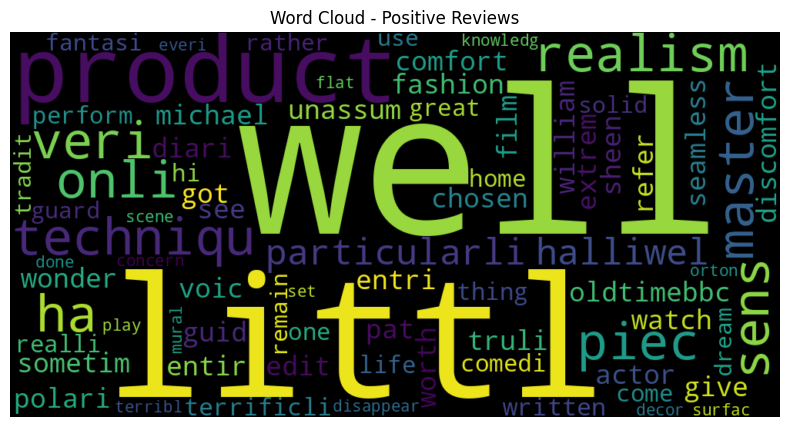

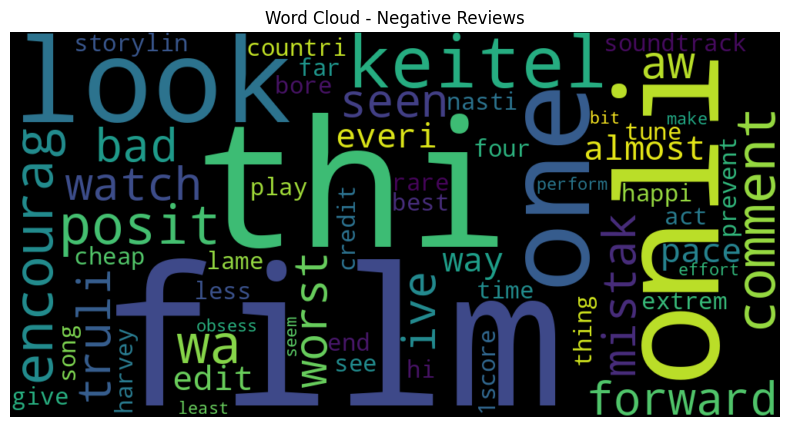

In [30]:
# Generate Word Clouds for Positive and Negative Sentiments
plt.figure(figsize=(10,5))
wordcloud_positive = WordCloud(width=1000, height=500, max_words=500, min_font_size=5).generate(normalized_train[1])
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Positive Reviews")
plt.show()

plt.figure(figsize=(10,5))
wordcloud_negative = WordCloud(width=1000, height=500, max_words=500, min_font_size=5).generate(normalized_train[8])
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Negative Reviews")
plt.show()
